In [269]:
# Dependencies and setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import datetime

In [192]:
traffic_raw = []
#Set up the api url and parameters


In [193]:
r = requests.get("https://data.austintexas.gov/resource/dx9v-zd7x.json", params = {
                "$limit": 300000,
                "$offset": 0
                })
if r.status_code == 200:     
        traffic_raw = r.json()
        #print("Record Start = " + str(offset) + "Pagination is " + str(increment))
        #offset += increment
        
else:
    print("***** IT IS BROKEN *****")
    print(r.status_code)

In [194]:
pd.DataFrame(traffic_raw)

,traffic_report_id,published_date,issue_reported,location,latitude,longitude,address,traffic_report_status,traffic_report_status_date_time
0,EBF5283D22437BB974F4248BA0EC4E90F26D32CB_15201...,2018-03-04T08:36:00.000Z,LOOSE LIVESTOCK,"(30.256997,-97.611818)",30.256997,-97.611818,N Fm 973 Rd & Fm 969 Rd,ARCHIVED,1970-01-18T14:16:00.000Z
1,9AE17B153A32567D1646CAA8C4010174C30AC349_15088...,2017-10-24T15:48:00.000Z,Crash Urgent,"(30.415159,-97.688372)",30.415159,-97.688372,12700 Metric Blvd,ARCHIVED,2017-10-24T15:51:00.000Z
2,A6990ED96E2C5ACAC92ACDCC3F83BA4E2893AD76_15088...,2017-10-24T15:49:00.000Z,Traffic Hazard,"(30.224758,-97.766467)",30.224758,-97.766467,300 W Ben White Blvd Wb,ARCHIVED,2017-10-24T15:51:00.000Z
3,551220DEEB362077F5DF356BDEBAF94F34F93F0C_15088...,2017-10-24T15:49:00.000Z,Crash Urgent,"(30.275603,-97.734873)",30.275603,-97.734873,E 15th St & Red River St,ARCHIVED,2017-10-24T15:51:00.000Z
4,0200320AE3BC247E747EF93E3259BC29DDF53392_15088...,2017-10-24T15:48:00.000Z,Crash Urgent,"(30.288241,-97.741506)",30.288241,-97.741506,2414 Guadalupe St,ARCHIVED,2017-10-24T15:51:00.000Z
...,...,...,...,...,...,...,...,...,...
158210,510B67B924C227BE10A0D00293F43E588A3BF528_15793...,2020-01-18T02:09:36.000Z,Traffic Hazard,"(30.478081,-97.805608)",30.478081,-97.805608,2900-2918 S Lakeline Blvd,ACTIVE,2020-01-18T02:15:04.000Z
158211,A5545296721299579E56C41888BD3B60E9287B43_15793...,2020-01-18T02:06:55.000Z,Traffic Hazard,"(30.240079,-97.830257)",30.240079,-97.830257,Republic Of Texas Blvd & Southwest Pkwy,ARCHIVED,2020-01-18T02:20:06.000Z
158212,5DB69F242F382BE567F2B3F31C40E0D8041BB424_15793...,2020-01-18T02:15:51.000Z,Traffic Hazard,"(30.33113,-97.700368)",30.33113,-97.700368,E St Johns Ave & Bennett Ave,ACTIVE,2020-01-18T02:20:06.000Z
158213,5053478148A345FC6440D360A7C3472114E7A350_15793...,2020-01-18T02:14:49.000Z,Traffic Hazard,"(30.240844,-97.756924)",30.240844,-97.756924,Wilson St & W Oltorf St,ARCHIVED,2020-01-18T02:25:04.000Z


In [195]:
#Munge the json output that was converted to a data frame
traffic_incidents_hour = [{
    "ReportID": rec["traffic_report_id"],
    "IncidentDesc": rec["issue_reported"],
    "Address": str(rec["address"]).upper(),
#    "Address": rec["address"],
    "IncidentDate": rec["traffic_report_status_date_time"]
#    "Year": pd.to_datetime(rec["traffic_report_status_date_time"]).strftime("%Y"),
#    "Hour": pd.to_datetime(rec["traffic_report_status_date_time"]).hour
} for rec in traffic_raw]
#Convert back to data frame
td = pd.DataFrame(traffic_incidents_hour)
td

,ReportID,IncidentDesc,Address,IncidentDate
0,EBF5283D22437BB974F4248BA0EC4E90F26D32CB_15201...,LOOSE LIVESTOCK,N FM 973 RD & FM 969 RD,1970-01-18T14:16:00.000Z
1,9AE17B153A32567D1646CAA8C4010174C30AC349_15088...,Crash Urgent,12700 METRIC BLVD,2017-10-24T15:51:00.000Z
2,A6990ED96E2C5ACAC92ACDCC3F83BA4E2893AD76_15088...,Traffic Hazard,300 W BEN WHITE BLVD WB,2017-10-24T15:51:00.000Z
3,551220DEEB362077F5DF356BDEBAF94F34F93F0C_15088...,Crash Urgent,E 15TH ST & RED RIVER ST,2017-10-24T15:51:00.000Z
4,0200320AE3BC247E747EF93E3259BC29DDF53392_15088...,Crash Urgent,2414 GUADALUPE ST,2017-10-24T15:51:00.000Z
...,...,...,...,...
158210,510B67B924C227BE10A0D00293F43E588A3BF528_15793...,Traffic Hazard,2900-2918 S LAKELINE BLVD,2020-01-18T02:15:04.000Z
158211,A5545296721299579E56C41888BD3B60E9287B43_15793...,Traffic Hazard,REPUBLIC OF TEXAS BLVD & SOUTHWEST PKWY,2020-01-18T02:20:06.000Z
158212,5DB69F242F382BE567F2B3F31C40E0D8041BB424_15793...,Traffic Hazard,E ST JOHNS AVE & BENNETT AVE,2020-01-18T02:20:06.000Z
158213,5053478148A345FC6440D360A7C3472114E7A350_15793...,Traffic Hazard,WILSON ST & W OLTORF ST,2020-01-18T02:25:04.000Z


In [196]:
pattern = ("(LAMAR)")
td["hwy"] = td["Address"].str.extract(pattern, expand = True)
td["RecordDate"] = td["IncidentDate"].str.extract("(\d+-\d+-\d+)", expand = True)
filtered_df = td[td.hwy.notnull()]

In [197]:
filtered_df

#filtered_df= filtered_df[filtered_df.Year.isin(["2017","2018","2019"])]

,ReportID,IncidentDesc,Address,IncidentDate,hwy,RecordDate
108,F594216AB73D45120DC603E926DA86C1AE918428_15089...,Crash Urgent,N LAMAR BLVD & W ST JOHNS AVE,2017-10-25T12:15:00.000Z,LAMAR,2017-10-25
128,BE2608CD9B0E64302FCB6170D889D6A11E1EBDD7_15089...,Crash Urgent,N LAMAR BLVD & W BRAKER LN,2017-10-25T13:40:00.000Z,LAMAR,2017-10-25
148,B37376966AC6D8C371B3A1D74862360FE5710E1C_15089...,Crash Service,2108 S LAMAR BLVD,2017-10-25T15:00:00.000Z,LAMAR,2017-10-25
149,869655D8ABDC71EBDF8A999DE0B7E85B1FA69D28_15089...,Crash Service,12430 N LAMAR BLVD,2017-10-25T15:00:00.000Z,LAMAR,2017-10-25
183,C71CC62930CF523FCF54EFD029485F66FA5D839A_15089...,Crash Service,9504 N LAMAR BLVD,2017-10-25T16:45:00.000Z,LAMAR,2017-10-25
...,...,...,...,...,...,...
157988,3CD969896E49A6D3326ACF33F0C2D8CC38B0D06A_15792...,Crash Urgent,218 S LAMAR BLVD SB,2020-01-17T02:50:04.000Z,LAMAR,2020-01-17
157998,FC27FBAE8511B00B820DA34FD107D27B11A72855_15792...,Crash Urgent,11100-11223 N LAMAR BLVD,2020-01-17T03:20:05.000Z,LAMAR,2020-01-17
158019,60EDEDC2F0013288E1BC81C585F0240B1762D22E_15792...,Traffic Hazard,W 45TH ST & N LAMAR BLVD,2020-01-17T06:25:04.000Z,LAMAR,2020-01-17
158107,09F8DF3C750BF6D2D367D1934CF0488F4576DBCD_15792...,Crash Urgent,W MARY ST & S LAMAR BLVD,2020-01-17T19:00:07.000Z,LAMAR,2020-01-17


In [126]:
incident_date = pd.DataFrame(filtered_df.groupby("RecordDate")["ReportID"].count()) \
    .rename(columns={"ReportID" : "Incident Count"})
incident_date


,Incident Count
RecordDate,
2017-10-25,11
2017-10-26,5
2017-10-27,8
2017-10-28,5
2017-10-29,2
...,...
2020-01-13,5
2020-01-14,11
2020-01-15,11


---
# Travel Data
---

In [179]:
bluetooth_raw = []
r = requests.get("https://data.austintexas.gov/resource/x44q-icha.json?$where=origin_reader_identifier like '%amar_%'"
                 , params = {
#                "$limit": 10,
                "$limit": 50000000,
                "$offset": 0
                
                })
if r.status_code == 200:     
        bluetooth_raw = r.json()
        #print("Record Start = " + str(offset) + "Pagination is " + str(increment))
        #offset += increment
        
else:
    print("***** IT IS BROKEN *****")
    print(r.status_code)

In [180]:
travel_data = [{
    "ID": rec["record_id"],
    "Start": rec["origin_reader_identifier"].upper(),
    "Ending": rec["destination_reader_identifier"].upper(),
    "TravelTime": int(rec["travel_time_seconds"]),
    "MPH": int(rec["speed_miles_per_hour"]),
    "StartTime": rec["start_time"],
    "EndTime": rec["end_time"]
#     "Year": pd.to_datetime(rec["traffic_report_status_date_time"]).strftime("%Y"),
#     "Hour": pd.to_datetime(rec["traffic_report_status_date_time"]).hour
} for rec in bluetooth_raw]

In [181]:
tvld = pd.DataFrame(travel_data)
#tvld

In [184]:
tvld.shape

(28600162, 7)

In [185]:
tvld["hwy"] = tvld["Ending"].str.extract("(LAMAR)", expand = True)
tvld["RecordDate"] = tvld["StartTime"].str.extract("(\d+-\d+-\d+)", expand = True)
tvld_filtered_df = tvld[tvld.hwy.notnull()]

In [186]:
travel_by_date = pd.DataFrame(tvld_filtered_df.groupby("RecordDate").agg({
                                 "ID" : "count",
                                 "TravelTime" : "mean",
                                 "MPH" : "mean"
                                })).rename(columns={
                                                        "ID" : "Vehicle Count",
                                                        "TravelTime" : "AVG Travel Time",
                                                        "MPH" : "AVG Speed (mph)"
                                                    })
travel_by_date

,Vehicle Count,AVG Travel Time,AVG Speed (mph)
RecordDate,,,
2015-12-31,15,449.866667,18.600000
2016-01-01,14189,124.319543,26.506237
2016-01-02,14717,138.959571,25.424407
2016-01-03,12244,123.206713,26.326446
2016-01-04,18615,136.857695,24.433145
...,...,...,...
2019-11-02,16667,144.774945,24.796004
2019-11-03,1,138.000000,17.000000
2019-11-04,18343,154.946792,22.710680


In [228]:
# incitent df  = incident_date
# travel df = travel_by_date
#merge two data sets into one data frame
main_df = travel_by_date.join(incident_date).fillna(0)
main_df["Incident Count"] = main_df["Incident Count"].astype("int64")
main_df.head(50)

,Vehicle Count,AVG Travel Time,AVG Speed (mph),Incident Count
RecordDate,,,,
2015-12-31,15,449.866667,18.600000,0
2016-01-01,14189,124.319543,26.506237,0
2016-01-02,14717,138.959571,25.424407,0
2016-01-03,12244,123.206713,26.326446,0
2016-01-04,18615,136.857695,24.433145,0
2016-01-05,20403,147.962800,24.440523,0
2016-01-06,22494,168.598960,23.199520,0
2016-01-07,19434,146.367037,23.085109,0
2016-01-08,20884,140.226106,23.251915,0


In [229]:
incident_impact = pd.DataFrame(main_df.groupby("Incident Count").agg({
                                 "Vehicle Count" : "sum",
                                 "AVG Travel Time" : "mean",
                                 "AVG Speed (mph)" : "mean"
                                }))

In [230]:
incident_impact = incident_impact[1:(len(incident_impact)-1)]

In [231]:
base_time = incident_impact["AVG Travel Time"].mean()
base_speed = incident_impact["AVG Speed (mph)"].mean() 
baseline=pd.DataFrame({
    "Base Time" : [base_time],
    "Base Speed" : [base_speed],

}) 

baseline

,Base Time,Base Speed
0,153.789892,23.803435


In [232]:
incident_impact["Travel_Impact"] =  (((incident_impact["AVG Travel Time"] - incident_impact["AVG Travel Time"].mean()) \
                                     / incident_impact["AVG Travel Time"].mean()) * 100)#.map("{0:.2f}%".format)

incident_impact["Speed_Impact"] =  (((incident_impact["AVG Speed (mph)"] - incident_impact["AVG Speed (mph)"].mean()) \
                                     / incident_impact["AVG Speed (mph)"].mean()) * 100)#.map("{0:.2f}%".format)

In [233]:
incident_impact

,Vehicle Count,AVG Travel Time,AVG Speed (mph),Travel_Impact,Speed_Impact
Incident Count,,,,,
1,254958,144.682082,25.006088,-5.922242,5.052433
2,431227,147.110610,25.140473,-4.343122,5.616994
3,690954,146.416049,25.055641,-4.794752,5.260610
4,984311,148.769861,24.714089,-3.264214,3.825724
5,1282116,149.938811,24.363522,-2.504119,2.352968
6,1340411,154.083408,23.797450,0.190855,-0.025144
7,1301171,150.372386,24.284899,-2.222192,2.022664
8,1133547,150.801633,24.150004,-1.943079,1.455960
9,1287839,153.464814,23.877811,-0.211378,0.312459


In [260]:
#function to auto label the bars for the plot with the percent value
# def autolabel(bars, incident_impactplt):
# #loop through the bars in the plot
#     for bar in bars:
# #store the horizontal position of the label
#         x = bar.get_x() + bar.get_width() / 2
# #store the value for the label 
#         y = bar.get_height()
# #if the bar value is successful(negative int) put the label at the -10 position otherwise put label at the 10 position
#         if y < 0:
#             ylab = -2
#         else:
#             ylab = 2
# #add label for bar
#         incident_impactplt.annotate("{0:.2f}%".format(y), (x,(ylab)), xytext = (0,5), textcoords = "offset points",
#                     ha ="center", va = "bottom", color = "k", fontsize = 15)
# #store the true or false value if the value is less than 0
# mask = incident_impact["Travel_Impact"] <= 0
# #create numpy array for each bar we are going to plot and store the value "r" for red
# colors = np.array(["y"] * len(incident_impact["Travel_Impact"]))
# #change the value to "g" where the mask array value matches the colors array
# colors[mask.values] = "m"
# #plot the data in a bar plot
# incident_impactplt = incident_impact["Travel_Impact"].plot.bar(figsize = (15,15),color = colors,width = 1, edgecolor = "k", \
#                                title = "Impact of Traffic Events On Travel Time (Lamar BLVD)",  \
#                                grid = True)
# #run label function
# autolabel(incident_impactplt.patches,incident_impactplt)
# #add x and y labels to plot
# incident_impactplt.set(xlabel = "Number Of Incidents (per day)", ylabel = "Impact On Travel Time (%)")
# #plt.savefig("tumor_chg.png")
# plt.show()

In [238]:
test = incident_impact.reset_index()
test

,Incident Count,Vehicle Count,AVG Travel Time,AVG Speed (mph),Travel_Impact,Speed_Impact
0,1,254958,144.682082,25.006088,-5.922242,5.052433
1,2,431227,147.110610,25.140473,-4.343122,5.616994
2,3,690954,146.416049,25.055641,-4.794752,5.260610
3,4,984311,148.769861,24.714089,-3.264214,3.825724
4,5,1282116,149.938811,24.363522,-2.504119,2.352968
5,6,1340411,154.083408,23.797450,0.190855,-0.025144
6,7,1301171,150.372386,24.284899,-2.222192,2.022664
7,8,1133547,150.801633,24.150004,-1.943079,1.455960
8,9,1287839,153.464814,23.877811,-0.211378,0.312459
9,10,654477,153.825428,23.515769,0.023107,-1.208508


In [239]:
#stage the bins and label variables
bins= [0, 3, 6, 9, 12, 15, 18, 21]
group_names = ["1-3","4-6","7-9","10-12","13-15","16-18","19-21"]
#create bins and create Age Range column to add to the dataframe
test["Incident Count"]= pd.cut(test["Incident Count"],bins, labels=group_names)
test


,Incident Count,Vehicle Count,AVG Travel Time,AVG Speed (mph),Travel_Impact,Speed_Impact
0,1-3,254958,144.682082,25.006088,-5.922242,5.052433
1,1-3,431227,147.110610,25.140473,-4.343122,5.616994
2,1-3,690954,146.416049,25.055641,-4.794752,5.260610
3,4-6,984311,148.769861,24.714089,-3.264214,3.825724
4,4-6,1282116,149.938811,24.363522,-2.504119,2.352968
5,4-6,1340411,154.083408,23.797450,0.190855,-0.025144
6,7-9,1301171,150.372386,24.284899,-2.222192,2.022664
7,7-9,1133547,150.801633,24.150004,-1.943079,1.455960
8,7-9,1287839,153.464814,23.877811,-0.211378,0.312459
9,10-12,654477,153.825428,23.515769,0.023107,-1.208508


In [282]:
incident_impact = pd.DataFrame(test.groupby("Incident Count").agg({
#                                  "Travel_Impact" : "mean",
                                 "Speed_Impact" : "mean"
                                }))
# incident_impact["Travel_Impact"] = incident_impact["Travel_Impact"].map("{0:.2f}".format)
#incident_impact["Speed_Impact"] = incident_impact["Speed_Impact"].map("{0:.2f}".format) 
incident_impact

,Speed_Impact
Incident Count,
1-3,5.310012
4-6,2.051183
7-9,1.263694
10-12,-1.012704
13-15,-2.792661
16-18,-4.004061
19-21,-6.450447


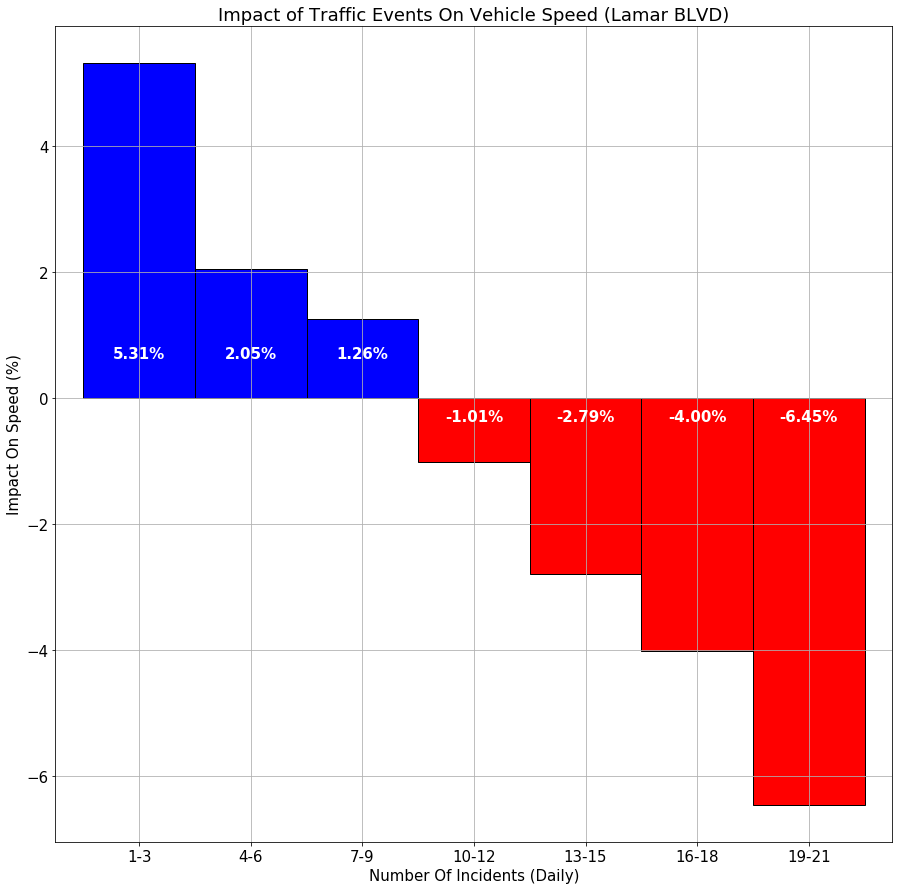

In [289]:
matplotlib.rcParams.update({'font.size': 15})
#function to auto label the bars for the plot with the percent value
def autolabel(bars, incident_impactplt):
#loop through the bars in the plot
    for bar in bars:
#store the horizontal position of the label
        x = bar.get_x() + bar.get_width() / 2
#store the value for the label 
        y = bar.get_height()
#if the bar value is successful(negative int) put the label at the -10 position otherwise put label at the 10 position
        if y < 0:
            ylab = -.5
        else:
            ylab = .5
#add label for bar
        incident_impactplt.annotate("{0:.2f}%".format(y), (x,(ylab)), xytext = (0,5), textcoords = "offset points",
                    ha ="center", va = "bottom", color = "w", fontsize = 15, weight = "bold")
#store the true or false value if the value is less than 0
mask = incident_impact["Speed_Impact"] <= 0
#create numpy array for each bar we are going to plot and store the value "r" for red
colors = np.array(["b"] * len(incident_impact["Speed_Impact"]))
#change the value to "g" where the mask array value matches the colors array
colors[mask.values] = "r"
#plot the data in a bar plot
incident_impactplt = incident_impact["Speed_Impact"].plot.bar(figsize = (15,15),color = colors,width = 1, edgecolor = "k", \
                               title = "Impact of Traffic Events On Vehicle Speed (Lamar BLVD)",  \
                               grid = True)
#run label function
autolabel(incident_impactplt.patches,incident_impactplt)
#add x and y labels to plot
incident_impactplt.set(xlabel = "Number Of Incidents (Daily)", ylabel = "Impact On Speed (%)")
plt.xticks(rotation='horizontal')
plt.savefig("Images/incident_impact.png")
plt.show()